In [1]:
import numpy as np

In [2]:
X = 2 * np.random.rand(100,1)
y = 4 + 3 * X  + np.random.rand(100,1)

In [3]:
%matplotlib inline

from matplotlib import pyplot as plt

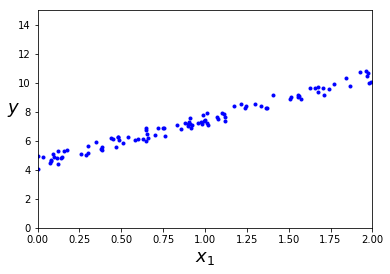

In [4]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

In [5]:
X_b = np.c_[np.ones((100,1)),X]

In [6]:
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [7]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(theta_best)

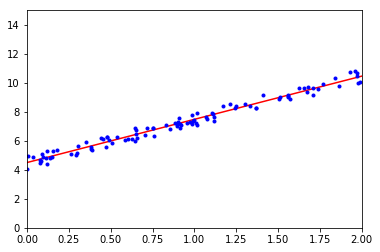

In [8]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0,2,0,15])
plt.show()

In [9]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X,y)
y_new_scikit = lin_reg.predict(X_new)

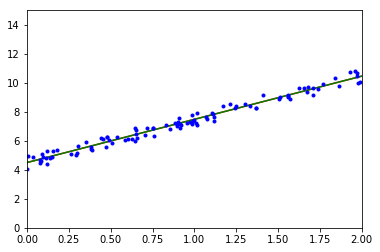

In [10]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X_new, y_new_scikit, "g-")
plt.plot(X, y, "b.")
plt.axis([0,2,0,15])
plt.show()

In [18]:
eta = 0.1

n_iterations = 1000
m = 100
theta = np.random.randn(2,1)

for iteration in range(n_iterations):
    gradient = 2 / m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradient
theta

array([[ 4.50084965],
       [ 2.98084968]])

In [29]:
n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
    return t0 / (t+t1)

theta = np.random.randn(2,1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2  * xi.T.dot(xi.dot(theta)-yi)
        eta = learning_schedule(epoch*m + i)
        theta = theta - eta*gradients
theta

array([[ 4.50756747],
       [ 2.97984019]])

In [31]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(n_iter=50, penalty=None, eta0=0.1)
sgd_reg.fit(X,y.ravel())

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.1,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', n_iter=50, penalty=None, power_t=0.25,
       random_state=None, shuffle=True, verbose=0, warm_start=False)

In [32]:
m = 100
X = 6 * np.random.rand(m,1) - 3
y = 0.5 * X**2 + X + 2 +np.random.randn(m,1)

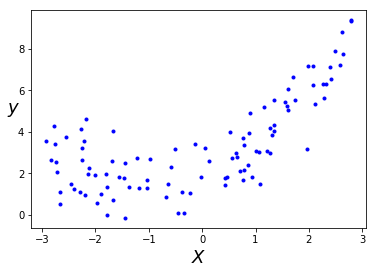

In [38]:
plt.plot(X, y, 'b.')
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", fontsize=18, rotation=0)
plt.show()

In [40]:
from sklearn.preprocessing import PolynomialFeatures

poly_feature = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_feature.fit_transform(X)
X[0]

array([ 1.15630553])

In [42]:
X_poly[0]

array([ 1.15630553,  1.33704248])

In [43]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([ 1.96320663]), array([[ 1.00414466,  0.4861813 ]]))

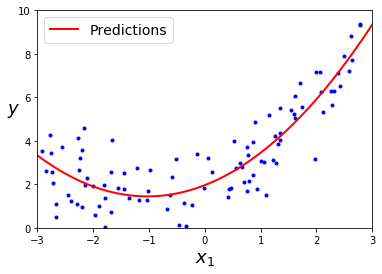

In [55]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_feature.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])

plt.show()